In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure you define the colour map you want search for '# Setting up Colour Map and season_name column for nsw_df'

link = './../data/NSW/nsw_df.parquet'
nsw_df = pd.read_parquet(link)

In [58]:
nsw_df.head(2)

,TOTALDEMAND,FORECASTDEMAND,TEMPERATURE,rrp,daily_avg_actual,daily_avg_forecast,forecast_error,smoothed_forecast_demand,year,quarter,month,dow,doy,hour,season,smoothed_total_demand,smoothed_temperature,minutes_past_midnight
2010-01-02 00:30:00,7343.30,7216.295694,24.3,20.67,NaN,NaN,91.620905,7699.974365,2010,1,1,5,2,0,1,7781.995417,25.233333,30
2010-01-02 01:00:00,7099.73,6977.373562,24.2,19.27,NaN,NaN,91.620905,7690.566078,2010,1,1,5,2,1,1,7773.996250,25.266667,60


In [59]:
def lag_plot(df=nsw_df, var_name='TOTALDEMAND', hue='season', lag=1, color_map='viridis', legend_title='legend'):
    # Generates a scatterplot lag plot
    
    # Main Scatter Plot
    for group in df[hue].unique():
        df_grouped = df[df[hue] == group]
        plt.scatter(df_grouped[var_name], df_grouped.shift(lag)[var_name], c=color_map[group], s=20, alpha=0.7)
    
    # Legend
    plt.legend(title=legend_title.title(), loc='lower right', frameon=True, labels=df[hue].unique())
        
    # Labelling Axis / Title
    plt.grid(True) #Grid
    plt.xlabel(f'{var_name.title()}(i)')
    plt.ylabel(f'{var_name.title()}(i+{str(lag)})')
    plt.title(f'Lag {lag} Plot: {var_name.title()}(i) vs {var_name.title()}(i+{str(lag)})')
    
    #Axis Limits   
    plt.xlim(min(df[var_name].min(), df.shift(lag)[var_name].min()), max(df[var_name].max(), df.shift(lag)[var_name].max()))
    plt.ylim(min(df[var_name].min(), df.shift(lag)[var_name].min()), max(df[var_name].max(), df.shift(lag)[var_name].max()))
    
    #Correlation Value Display
    plt.text(df[var_name].min() + 0.08 * df[var_name].min(), df[var_name].max() - 0.08 * df[var_name].max(),
             f'r={df[var_name].corr(df.shift(lag)[var_name]):.2f}', va='top', ha='left', fontsize=15,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    # Adding line Y=X
    plt.axline((0, 0), slope=1, color='black', linestyle='--')
    return None

In [60]:
# Setting up Colour Map and season_name column for nsw_df
c_map = {'Summer':'red', 'Autumn':'brown', 'Winter':'blue', 'Spring':'orange'}
nsw_df['season_name'] = nsw_df['month'].map(lambda m: 'Summer' if m in [1, 2, 12] else ('Autumn' if m in [3, 4, 5] else ('Winter' if m in [6, 7, 8] else 'Spring'))).astype('category')

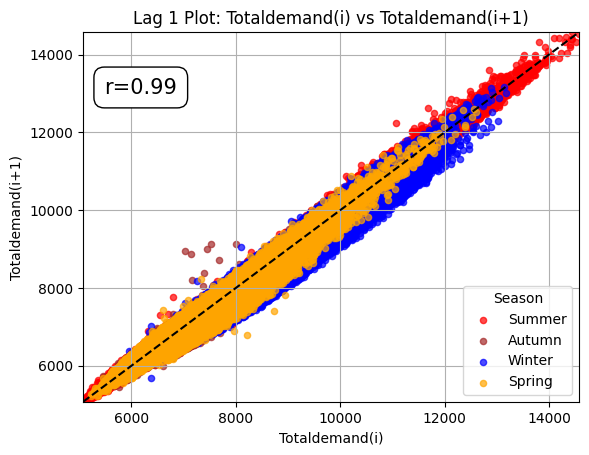

In [61]:
lag_plot(df=nsw_df, var_name='TOTALDEMAND', hue='season_name', lag=1, color_map=c_map, legend_title='season')

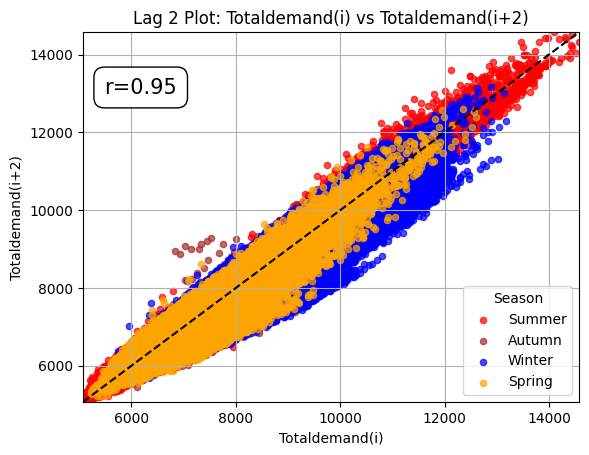

In [62]:
lag_plot(df=nsw_df, var_name='TOTALDEMAND', hue='season_name', lag=2, color_map=c_map, legend_title='season')

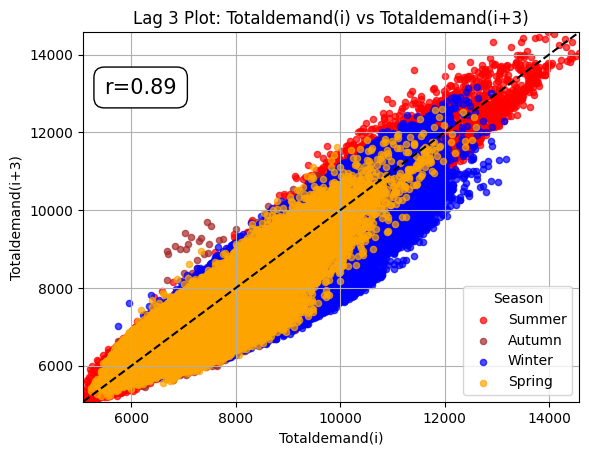

In [63]:
lag_plot(df=nsw_df, var_name='TOTALDEMAND', hue='season_name', lag=3, color_map=c_map, legend_title='season')

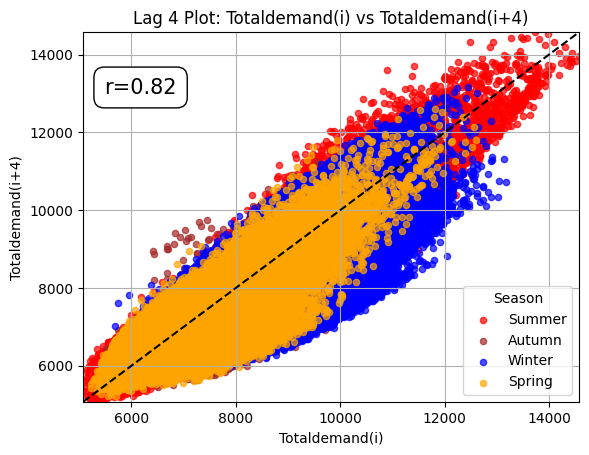

In [64]:
lag_plot(df=nsw_df, var_name='TOTALDEMAND', hue='season_name', lag=4, color_map=c_map, legend_title='season')